# マイナビ　学生コンペ
## アプローチ
- データ相関
- randam forest
- boosting

## データ読み込み

In [1]:
import pandas as pd
import numpy as np

In [2]:
trainData = pd.read_csv("./input/train.csv")
testData = pd.read_csv("./input/test.csv")
testData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters
0,19075,2017-02-25,12:35,第1節,第1日,横浜FM,浦和,日産スタジアム,晴,10.2,45.0,DAZN/テレビ神奈川/テレ玉
1,19076,2017-02-25,14:04,第1節,第1日,仙台,札幌,ユアテックスタジアム仙台,曇,10.6,36.0,DAZN/NHK仙台/NHK札幌
2,19077,2017-02-25,14:04,第1節,第1日,鹿島,FC東京,県立カシマサッカースタジアム,晴,10.1,63.0,DAZN/NHK総合
3,19078,2017-02-25,14:04,第1節,第1日,清水,神戸,IAIスタジアム日本平,晴,15.0,40.0,DAZN/NHK BS1/テレビ静岡
4,19079,2017-02-25,14:04,第1節,第1日,広島,新潟,エディオンスタジアム広島,晴,11.2,45.0,DAZN/NHK広島/NHK新潟


In [3]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 12 columns):
id               477 non-null int64
match_date       477 non-null object
kick_off_time    477 non-null object
section          477 non-null object
round            477 non-null object
home_team        477 non-null object
away_team        477 non-null object
venue            477 non-null object
weather          459 non-null object
temperature      459 non-null float64
humidity         459 non-null float64
broadcasters     477 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 44.8+ KB


In [4]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3366 entries, 0 to 3365
Data columns (total 13 columns):
id               3366 non-null int64
match_date       3366 non-null object
kick_off_time    3366 non-null object
section          3366 non-null object
round            3366 non-null object
home_team        3366 non-null object
away_team        3366 non-null object
venue            3366 non-null object
weather          3366 non-null object
temperature      3366 non-null float64
humidity         3366 non-null int64
broadcasters     3366 non-null object
attendance       3366 non-null int64
dtypes: float64(1), int64(3), object(9)
memory usage: 341.9+ KB


In [5]:
trainData['humidity'] = trainData['humidity'].astype(float)
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3366 entries, 0 to 3365
Data columns (total 13 columns):
id               3366 non-null int64
match_date       3366 non-null object
kick_off_time    3366 non-null object
section          3366 non-null object
round            3366 non-null object
home_team        3366 non-null object
away_team        3366 non-null object
venue            3366 non-null object
weather          3366 non-null object
temperature      3366 non-null float64
humidity         3366 non-null float64
broadcasters     3366 non-null object
attendance       3366 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 341.9+ KB


In [6]:
import seaborn as sns
sns.heatmap(trainData[[ 'temperature','humidity','attendance']].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

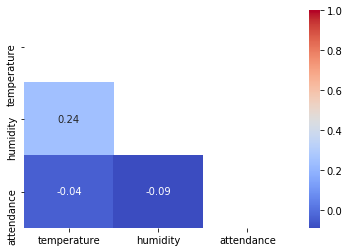

In [7]:
mask = np.zeros_like(trainData[['temperature','humidity','attendance']].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(trainData[[ 'temperature','humidity','attendance']].corr(), annot=True, fmt = ".2f", cmap = "coolwarm", mask=mask)

### int型になっているデータのほとんどが相関性がないので使えなさそう
- 相関性がありそうなobject
-- 曜日，天気，スタジアム
→数値化して見てみる

#### 天気

In [8]:
pd.get_dummies(trainData["weather"]).columns.values

array(['屋内', '晴', '晴のち曇', '晴のち曇一時雨', '晴のち雨', '晴のち雪', '晴一時曇', '晴一時雨',
       '晴一時雨のち曇', '晴時々曇', '晴時々曇一時雨', '晴時々雪', '曇', '曇のち晴', '曇のち雨',
       '曇のち雨のち屋内', '曇のち雨のち晴', '曇のち雨のち曇', '曇のち雨一時雷', '曇のち雷雨', '曇一時晴',
       '曇一時雨', '曇一時雨のち晴', '曇一時雨のち曇', '曇一時雷雨のち曇', '曇一時雷雨のち雨', '曇時々晴',
       '曇時々晴のち屋内', '曇時々晴一時雨', '曇時々雨', '曇時々雨のち晴', '曇時々雪', '雨', '雨のち晴',
       '雨のち曇', '雨のち曇のち晴', '雨のち曇一時雨', '雨のち曇時々雨', '雨一時曇', '雨一時曇のち雨',
       '雨一時雷雨', '雨時々晴', '雨時々曇', '雪', '雷雨のち曇', '霧'], dtype=object)

In [9]:
trainData["weather"] = trainData["weather"].map({'屋内':0, '晴':1, '晴のち曇':2, '晴のち曇一時雨':3, '晴のち雨':4, '晴のち雪':5, '晴一時曇':6, '晴一時雨':7,
       '晴一時雨のち曇':8, '晴時々曇':9, '晴時々曇一時雨':10, '晴時々雪':11, '曇':12, '曇のち晴':13, '曇のち雨':14,
       '曇のち雨のち屋内':15, '曇のち雨のち晴':16, '曇のち雨のち曇':17, '曇のち雨一時雷':18, '曇のち雷雨':19, '曇一時晴':20,
       '曇一時雨':21, '曇一時雨のち晴':22, '曇一時雨のち曇':23, '曇一時雷雨のち曇':24, '曇一時雷雨のち雨':25, '曇時々晴':26,
       '曇時々晴のち屋内':27, '曇時々晴一時雨':28, '曇時々雨':29, '曇時々雨のち晴':30, '曇時々雪':31, '雨':32, '雨のち晴':33,
       '雨のち曇':34, '雨のち曇のち晴':35, '雨のち曇一時雨':36, '雨のち曇時々雨':37, '雨一時曇':38, '雨一時曇のち雨':39,
       '雨一時雷雨':40, '雨時々晴':41, '雨時々曇':42, '雪':43, '雷雨のち曇':44, '霧':45})
testData['weather'] = testData['weather'].map({'屋内':0, '晴':1, '晴のち曇':2, '晴のち曇一時雨':3, '晴のち雨':4, '晴のち雪':5, '晴一時曇':6, '晴一時雨':7,
       '晴一時雨のち曇':8, '晴時々曇':9, '晴時々曇一時雨':10, '晴時々雪':11, '曇':12, '曇のち晴':13, '曇のち雨':14,
       '曇のち雨のち屋内':15, '曇のち雨のち晴':16, '曇のち雨のち曇':17, '曇のち雨一時雷':18, '曇のち雷雨':19, '曇一時晴':20,
       '曇一時雨':21, '曇一時雨のち晴':22, '曇一時雨のち曇':23, '曇一時雷雨のち曇':24, '曇一時雷雨のち雨':25, '曇時々晴':26,
       '曇時々晴のち屋内':27, '曇時々晴一時雨':28, '曇時々雨':29, '曇時々雨のち晴':30, '曇時々雪':31, '雨':32, '雨のち晴':33,
       '雨のち曇':34, '雨のち曇のち晴':35, '雨のち曇一時雨':36, '雨のち曇時々雨':37, '雨一時曇':38, '雨一時曇のち雨':39,
       '雨一時雷雨':40, '雨時々晴':41, '雨時々曇':42, '雪':43, '雷雨のち曇':44, '霧':45})

In [10]:
testData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters
0,19075,2017-02-25,12:35,第1節,第1日,横浜FM,浦和,日産スタジアム,1.0,10.2,45.0,DAZN/テレビ神奈川/テレ玉
1,19076,2017-02-25,14:04,第1節,第1日,仙台,札幌,ユアテックスタジアム仙台,12.0,10.6,36.0,DAZN/NHK仙台/NHK札幌
2,19077,2017-02-25,14:04,第1節,第1日,鹿島,FC東京,県立カシマサッカースタジアム,1.0,10.1,63.0,DAZN/NHK総合
3,19078,2017-02-25,14:04,第1節,第1日,清水,神戸,IAIスタジアム日本平,1.0,15.0,40.0,DAZN/NHK BS1/テレビ静岡
4,19079,2017-02-25,14:04,第1節,第1日,広島,新潟,エディオンスタジアム広島,1.0,11.2,45.0,DAZN/NHK広島/NHK新潟


#### スタジアム

In [11]:
pd.get_dummies(trainData["venue"]).columns.values

array(['IAIスタジアム日本平', 'NACK5スタジアム大宮', 'NDソフトスタジアム山形', 'ShonanBMWスタジアム平塚',
       'さいたま市浦和駒場スタジアム', 'アウトソーシングスタジアム日本平', 'エコパスタジアム', 'エディオンスタジアム広島',
       'キンチョウスタジアム', 'コカ・コーラウエスト広島スタジアム', 'デンカビッグスワンスタジアム', 'ニッパツ三ツ沢球技場',
       'ノエビアスタジアム神戸', 'パロマ瑞穂スタジアム', 'フクダ電子アリーナ', 'ベストアメニティスタジアム',
       'ホームズスタジアム神戸', 'ヤマハスタジアム(磐田)', 'ヤンマースタジアム長居', 'ユアテックスタジアム仙台',
       'レベルファイブスタジアム', '万博記念競技場', '九州石油ドーム', '京都市西京極総合運動公園陸上競技場兼球技場',
       '佐賀県総合運動場陸上競技場', '名古屋市瑞穂球技場', '名古屋市瑞穂陸上競技場', '味の素スタジアム', '国立競技場',
       '埼玉スタジアム2002', '大分銀行ドーム', '大阪長居スタジアム', '大阪長居第2陸上競技場', '宮城スタジアム',
       '山梨中銀スタジアム', '山梨県小瀬スポーツ公園陸上競技場', '市立吹田サッカースタジアム', '平塚競技場',
       '広島ビッグアーチ', '新潟スタジアム', '日本平スタジアム', '日産スタジアム', '日立柏サッカー場', '札幌ドーム',
       '札幌厚別公園競技場', '東北電力ビッグスワンスタジアム', '東平尾公園博多の森球技場', '松本平広域公園総合球技場',
       '柏の葉公園総合競技場', '横浜市三ツ沢公園球技場', '熊本県民総合運動公園陸上競技場', '熊谷スポーツ文化公園陸上競技場',
       '県立カシマサッカースタジアム', '石川県西部緑地公園陸上競技場', '神戸総合運動公園ユニバー記念競技場',
       '等々力陸上競技場', '豊田スタジアム', '静岡スタジアムエコパ', '鳴門・大塚スポーツパークポカリスエットスタジアム',
       '

In [12]:
pd.get_dummies(testData["venue"]).columns.values

array(['IAIスタジアム日本平', 'NACK5スタジアム大宮', 'ShonanBMWスタジアム平塚', 'エコパスタジアム',
       'エディオンスタジアム広島', 'キンチョウスタジアム', 'デンカビッグスワンスタジアム', 'トランスコスモススタジアム長崎',
       'ニッパツ三ツ沢球技場', 'ノエビアスタジアム神戸', 'パナソニックスタジアム吹田', 'パロマ瑞穂スタジアム',
       'ベストアメニティスタジアム', 'ヤマハスタジアム(磐田)', 'ヤンマースタジアム長居', 'ユアテックスタジアム仙台',
       '三協フロンテア柏スタジアム', '味の素スタジアム', '埼玉スタジアム2002', '山梨中銀スタジアム',
       '市立吹田サッカースタジアム', '日産スタジアム', '日立柏サッカー場', '札幌ドーム', '札幌厚別公園競技場',
       '熊谷スポーツ文化公園陸上競技場', '県立カシマサッカースタジアム', '神戸総合運動公園ユニバー記念競技場',
       '等々力陸上競技場', '豊田スタジアム'], dtype=object)

In [13]:
trainData["venue_id"] = trainData["venue"].map({'IAIスタジアム日本平':0, 'NACK5スタジアム大宮':1, 'NDソフトスタジアム山形':2, 'ShonanBMWスタジアム平塚':3,
       'さいたま市浦和駒場スタジアム':4, 'アウトソーシングスタジアム日本平':5, 'エコパスタジアム':6, 'エディオンスタジアム広島':7,
       'キンチョウスタジアム':8, 'コカ・コーラウエスト広島スタジアム':9, 'デンカビッグスワンスタジアム':10, 'ニッパツ三ツ沢球技場':11,
       'ノエビアスタジアム神戸':12, 'パロマ瑞穂スタジアム':13, 'フクダ電子アリーナ':14, 'ベストアメニティスタジアム':15,
       'ホームズスタジアム神戸':16, 'ヤマハスタジアム(磐田)':17, 'ヤンマースタジアム長居':18, 'ユアテックスタジアム仙台':19,
       'レベルファイブスタジアム':20, '万博記念競技場':21, '九州石油ドーム':22, '京都市西京極総合運動公園陸上競技場兼球技場':23,
       '佐賀県総合運動場陸上競技場':24, '名古屋市瑞穂球技場':25, '名古屋市瑞穂陸上競技場':26, '味の素スタジアム':27, '国立競技場':28,
       '埼玉スタジアム2002':29, '大分銀行ドーム':30, '大阪長居スタジアム':31, '大阪長居第2陸上競技場':32, '宮城スタジアム':33,
       '山梨中銀スタジアム':34, '山梨県小瀬スポーツ公園陸上競技場':35, '市立吹田サッカースタジアム':36, '平塚競技場':37,
       '広島ビッグアーチ':38, '新潟スタジアム':39, '日本平スタジアム':40, '日産スタジアム':41, '日立柏サッカー場':42, '札幌ドーム':43,
       '札幌厚別公園競技場':44, '東北電力ビッグスワンスタジアム':45, '東平尾公園博多の森球技場':46, '松本平広域公園総合球技場':47,
       '柏の葉公園総合競技場':48, '横浜市三ツ沢公園球技場':49, '熊本県民総合運動公園陸上競技場':50, '熊谷スポーツ文化公園陸上競技場':51,
       '県立カシマサッカースタジアム':52, '石川県西部緑地公園陸上競技場':53, '神戸総合運動公園ユニバー記念競技場':54,
       '等々力陸上競技場':55, '豊田スタジアム':56, '静岡スタジアムエコパ':57, '鳴門・大塚スポーツパークポカリスエットスタジアム':58,
       '鹿児島県立鴨池陸上競技場':59})
testData['venue_id'] = testData["venue"].map({'IAIスタジアム日本平':0, 'NACK5スタジアム大宮':1, 'NDソフトスタジアム山形':2, 'ShonanBMWスタジアム平塚':3,
       'さいたま市浦和駒場スタジアム':4, 'アウトソーシングスタジアム日本平':5, 'エコパスタジアム':6, 'エディオンスタジアム広島':7,
       'キンチョウスタジアム':8, 'コカ・コーラウエスト広島スタジアム':9, 'デンカビッグスワンスタジアム':10, 'ニッパツ三ツ沢球技場':11,
       'ノエビアスタジアム神戸':12, 'パロマ瑞穂スタジアム':13, 'フクダ電子アリーナ':14, 'ベストアメニティスタジアム':15,
       'ホームズスタジアム神戸':16, 'ヤマハスタジアム(磐田)':17, 'ヤンマースタジアム長居':18, 'ユアテックスタジアム仙台':19,
       'レベルファイブスタジアム':20, '万博記念競技場':21, '九州石油ドーム':22, '京都市西京極総合運動公園陸上競技場兼球技場':23,
       '佐賀県総合運動場陸上競技場':24, '名古屋市瑞穂球技場':25, '名古屋市瑞穂陸上競技場':26, '味の素スタジアム':27, '国立競技場':28,
       '埼玉スタジアム2002':29, '大分銀行ドーム':30, '大阪長居スタジアム':31, '大阪長居第2陸上競技場':32, '宮城スタジアム':33,
       '山梨中銀スタジアム':34, '山梨県小瀬スポーツ公園陸上競技場':35, '市立吹田サッカースタジアム':36, '平塚競技場':37,
       '広島ビッグアーチ':38, '新潟スタジアム':39, '日本平スタジアム':40, '日産スタジアム':41, '日立柏サッカー場':42, '札幌ドーム':43,
       '札幌厚別公園競技場':44, '東北電力ビッグスワンスタジアム':45, '東平尾公園博多の森球技場':46, '松本平広域公園総合球技場':47,
       '柏の葉公園総合競技場':48, '横浜市三ツ沢公園球技場':49, '熊本県民総合運動公園陸上競技場':50, '熊谷スポーツ文化公園陸上競技場':51,
       '県立カシマサッカースタジアム':52, '石川県西部緑地公園陸上競技場':53, '神戸総合運動公園ユニバー記念競技場':54,
       '等々力陸上競技場':55, '豊田スタジアム':56, '静岡スタジアムエコパ':57, '鳴門・大塚スポーツパークポカリスエットスタジアム':58,
       '鹿児島県立鴨池陸上競技場':59})

In [14]:
testData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,venue_id
0,19075,2017-02-25,12:35,第1節,第1日,横浜FM,浦和,日産スタジアム,1.0,10.2,45.0,DAZN/テレビ神奈川/テレ玉,41.0
1,19076,2017-02-25,14:04,第1節,第1日,仙台,札幌,ユアテックスタジアム仙台,12.0,10.6,36.0,DAZN/NHK仙台/NHK札幌,19.0
2,19077,2017-02-25,14:04,第1節,第1日,鹿島,FC東京,県立カシマサッカースタジアム,1.0,10.1,63.0,DAZN/NHK総合,52.0
3,19078,2017-02-25,14:04,第1節,第1日,清水,神戸,IAIスタジアム日本平,1.0,15.0,40.0,DAZN/NHK BS1/テレビ静岡,0.0
4,19079,2017-02-25,14:04,第1節,第1日,広島,新潟,エディオンスタジアム広島,1.0,11.2,45.0,DAZN/NHK広島/NHK新潟,7.0


#### 日付→曜日→ダミー

In [15]:
from datetime import datetime
import locale

In [16]:
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance,venue_id
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,万博記念競技場,1,8.3,40.0,NHK総合/J SPORTS(録),20916,21
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,1,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,35
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,味の素スタジアム,1,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録),22531,27
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,1,11.6,42.0,J SPORTS,28564,57
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,1,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,26


In [17]:
from datetime import datetime
datetime.strptime(trainData["match_date"][1],"%Y-%m-%d")

datetime.datetime(2006, 3, 5, 0, 0)

In [66]:
holidaycsv = pd.read_csv('./input/holidays_in_japan.csv')
train_holiday = []
test_holiday =[]
train_day_of_the_week = []
train_month =[]
train_year = []
test_day_of_the_week =[]
test_month = []
test_year = []
for i in range(len(trainData)):
    train_day_of_the_week.append(datetime.strptime(trainData["match_date"][i],"%Y-%m-%d").strftime('%a'))
    train_month.append(datetime.strptime(trainData["match_date"][i],"%Y-%m-%d").month)
    train_year.append(datetime.strptime(trainData["match_date"][i],"%Y-%m-%d").year)
    for j in range(len(holidaycsv)):
        if trainData['match_date'][i] == holidaycsv['holiday_date'][j]:
            train_holiday.append(1)
        elif j == len(holidaycsv)-1 and len(train_holiday) == i:
            train_holiday.append(0)
for i in range(len(testData)):
    test_day_of_the_week.append(datetime.strptime(testData["match_date"][i],"%Y-%m-%d").strftime('%a'))
    test_month.append(datetime.strptime(testData["match_date"][i],"%Y-%m-%d").month)
    test_year.append(datetime.strptime(testData["match_date"][i],"%Y-%m-%d").year)
    for j in range(len(holidaycsv)):
        if testData['match_date'][i] == holidaycsv['holiday_date'][j]:
            test_holiday.append(1)
        elif j == len(holidaycsv)-1 and len(test_holiday) == i:
            test_holiday.append(0)

In [67]:
len(train_holiday)

3366

In [68]:
trainData["day_of_the_week"] = train_day_of_the_week
trainData["month"] = train_month
trainData["year"] = train_year
trainData['holiday'] = train_holiday
testData["day_of_the_week"] = test_day_of_the_week
testData["month"] = test_month
testData["year"] = test_year
testData['holiday'] = test_holiday

In [69]:
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,...,venue_市立吹田サッカースタジアム,venue_日産スタジアム,venue_日立柏サッカー場,venue_札幌ドーム,venue_札幌厚別公園競技場,venue_熊谷スポーツ文化公園陸上競技場,venue_県立カシマサッカースタジアム,venue_神戸総合運動公園ユニバー記念競技場,venue_等々力陸上競技場,venue_豊田スタジアム
0,9190,2006-03-04,16:04,1,1,G大阪,浦和,万博記念競技場,1,8.3,...,False,False,False,False,False,False,False,False,False,False
1,9191,2006-03-05,13:00,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,1,12.9,...,False,False,False,False,False,False,False,False,False,False
2,9192,2006-03-05,13:35,1,2,FC東京,大分,味の素スタジアム,1,12.1,...,False,False,False,False,False,False,False,False,False,False
3,9193,2006-03-05,14:04,1,2,磐田,福岡,静岡スタジアムエコパ,1,11.6,...,False,False,False,False,False,False,False,False,False,False
4,9194,2006-03-05,14:04,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,1,13.1,...,False,False,False,False,False,False,False,False,False,False


In [70]:
pd.get_dummies(trainData["day_of_the_week"]).columns.values

array(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype=object)

In [71]:
trainData["day_of_the_week_id"] = trainData["day_of_the_week"].map({'Fri':5, 'Mon':1, 'Sat':6, 'Sun':0, 'Thu':4, 'Tue':2, 'Wed':3})
testData["day_of_the_week_id"] = testData["day_of_the_week"].map({'Fri':5, 'Mon':1, 'Sat':6, 'Sun':0, 'Thu':4, 'Tue':2, 'Wed':3})

In [72]:
testData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,...,venue_日産スタジアム,venue_日立柏サッカー場,venue_札幌ドーム,venue_札幌厚別公園競技場,venue_熊谷スポーツ文化公園陸上競技場,venue_県立カシマサッカースタジアム,venue_神戸総合運動公園ユニバー記念競技場,venue_等々力陸上競技場,venue_豊田スタジアム,day_of_the_week_id
0,19075,2017-02-25,12:35,1,1,横浜FM,浦和,日産スタジアム,10.2,10.2,...,True,False,False,False,False,False,False,False,False,6
1,19076,2017-02-25,14:04,1,1,仙台,札幌,ユアテックスタジアム仙台,10.6,10.6,...,False,False,False,False,False,False,False,False,False,6
2,19077,2017-02-25,14:04,1,1,鹿島,FC東京,県立カシマサッカースタジアム,10.1,10.1,...,False,False,False,False,False,True,False,False,False,6
3,19078,2017-02-25,14:04,1,1,清水,神戸,IAIスタジアム日本平,15.0,15.0,...,False,False,False,False,False,False,False,False,False,6
4,19079,2017-02-25,14:04,1,1,広島,新潟,エディオンスタジアム広島,11.2,11.2,...,False,False,False,False,False,False,False,False,False,6


In [25]:
trainData.dtypes

id                   int64
match_date          object
kick_off_time       object
section             object
round               object
home_team           object
away_team           object
venue               object
weather              int64
temperature        float64
humidity           float64
broadcasters        object
attendance           int64
venue_id             int64
day_of_the_week      int64
month                int64
year                 int64
holiday              int64
dtype: object

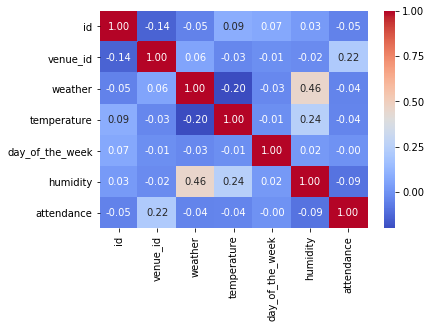

In [26]:
sns.heatmap(trainData[['id','venue_id','weather','temperature','day_of_the_week','humidity','attendance']].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

#### セクション，ラウンド

In [27]:
pd.get_dummies(trainData["section"]).columns.values

array(['第10節', '第11節', '第12節', '第13節', '第14節', '第15節', '第16節', '第17節',
       '第18節', '第19節', '第1節', '第20節', '第21節', '第22節', '第23節', '第24節',
       '第25節', '第26節', '第27節', '第28節', '第29節', '第2節', '第30節', '第31節',
       '第32節', '第33節', '第34節', '第3節', '第4節', '第5節', '第6節', '第7節', '第8節',
       '第9節'], dtype=object)

In [28]:
for i in range(len(trainData)):
    trainData["section"][i] = trainData["section"][i].replace("第","").replace("節","")
    trainData["round"][i] = trainData["round"][i].replace("第","").replace("日","")
for i in range(len(testData)):
    testData["section"][i] = testData["section"][i].replace("第","").replace("節","")
    testData["round"][i] = testData["round"][i].replace("第","").replace("日","")

/home/aj1m0n/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/aj1m0n/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/aj1m0n/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [29]:
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance,venue_id,day_of_the_week,month,year,holiday
0,9190,2006-03-04,16:04,1,1,G大阪,浦和,万博記念競技場,1,8.3,40.0,NHK総合/J SPORTS(録),20916,21,6,3,2006,0
1,9191,2006-03-05,13:00,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,1,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,35,0,3,2006,0
2,9192,2006-03-05,13:35,1,2,FC東京,大分,味の素スタジアム,1,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録),22531,27,0,3,2006,0
3,9193,2006-03-05,14:04,1,2,磐田,福岡,静岡スタジアムエコパ,1,11.6,42.0,J SPORTS,28564,57,0,3,2006,0
4,9194,2006-03-05,14:04,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,1,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,26,0,3,2006,0


In [30]:
trainData = trainData.drop('broadcasters',axis=1)
testData = testData.drop("broadcasters",axis=1)

In [31]:
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,attendance,venue_id,day_of_the_week,month,year,holiday
0,9190,2006-03-04,16:04,1,1,G大阪,浦和,万博記念競技場,1,8.3,40.0,20916,21,6,3,2006,0
1,9191,2006-03-05,13:00,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,1,12.9,28.0,14277,35,0,3,2006,0
2,9192,2006-03-05,13:35,1,2,FC東京,大分,味の素スタジアム,1,12.1,35.0,22531,27,0,3,2006,0
3,9193,2006-03-05,14:04,1,2,磐田,福岡,静岡スタジアムエコパ,1,11.6,42.0,28564,57,0,3,2006,0
4,9194,2006-03-05,14:04,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,1,13.1,32.0,17199,26,0,3,2006,0


In [32]:
trainData.to_csv("./input/2new_traindata.csv")

### kick off time hour

In [33]:
pd.get_dummies(trainData['kick_off_time']).columns.values

array(['12:34', '13:00', '13:01', '13:02', '13:03', '13:04', '13:05',
       '13:06', '13:33', '13:34', '13:35', '13:36', '14:00', '14:01',
       '14:02', '14:03', '14:04', '14:05', '14:06', '14:09', '14:30',
       '14:31', '14:33', '14:34', '14:35', '14:36', '15:00', '15:01',
       '15:02', '15:03', '15:04', '15:05', '15:06', '15:07', '15:31',
       '15:32', '15:33', '15:34', '15:35', '15:36', '15:37', '16:00',
       '16:01', '16:02', '16:03', '16:04', '16:05', '16:06', '16:07',
       '16:34', '16:53', '17:00', '17:03', '17:04', '17:05', '17:06',
       '17:32', '17:33', '17:34', '18:00', '18:01', '18:02', '18:03',
       '18:04', '18:05', '18:06', '18:30', '18:31', '18:32', '18:33',
       '18:34', '18:35', '18:36', '18:59', '19:00', '19:01', '19:02',
       '19:03', '19:04', '19:05', '19:06', '19:07', '19:15', '19:30',
       '19:31', '19:32', '19:33', '19:34', '19:35', '19:36', '20:04',
       '20:05'], dtype=object)

In [34]:
from datetime import datetime
datetime.strptime(trainData["kick_off_time"][1],"%H:%M")

datetime.datetime(1900, 1, 1, 13, 0)

In [35]:
train_kick_off_time_hour = []
test_kick_off_time_hour = []
for i in range(len(trainData)):
    train_kick_off_time_hour.append(datetime.strptime(trainData["kick_off_time"][i],"%H:%M").hour)
for i in range(len(testData)):
    test_kick_off_time_hour.append(datetime.strptime(testData["kick_off_time"][i],"%H:%M").hour)    

In [36]:
trainData['kick_off_time_hour'] = train_kick_off_time_hour
testData['kick_off_time_hour'] = test_kick_off_time_hour

In [37]:
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,attendance,venue_id,day_of_the_week,month,year,holiday,kick_off_time_hour
0,9190,2006-03-04,16:04,1,1,G大阪,浦和,万博記念競技場,1,8.3,40.0,20916,21,6,3,2006,0,16
1,9191,2006-03-05,13:00,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,1,12.9,28.0,14277,35,0,3,2006,0,13
2,9192,2006-03-05,13:35,1,2,FC東京,大分,味の素スタジアム,1,12.1,35.0,22531,27,0,3,2006,0,13
3,9193,2006-03-05,14:04,1,2,磐田,福岡,静岡スタジアムエコパ,1,11.6,42.0,28564,57,0,3,2006,0,14
4,9194,2006-03-05,14:04,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,1,13.1,32.0,17199,26,0,3,2006,0,14


In [38]:
pd.get_dummies(trainData['home_team']).columns.values

array(['C大阪', 'FC東京', 'G大阪', '京都', '仙台', '千葉', '名古屋', '大分', '大宮', '山形',
       '川崎F', '広島', '徳島', '新潟', '札幌', '東京V', '松本', '柏', '横浜FC', '横浜FM',
       '浦和', '清水', '湘南', '甲府', '磐田', '神戸', '福岡', '鳥栖', '鹿島'], dtype=object)

In [39]:
trainData["home_team_id"] = trainData["home_team"].map({'C大阪':0, 'FC東京':1, 'G大阪':2, '京都':3, '仙台':4, '千葉':5, '名古屋':6, '大分':7, '大宮':8, '山形':9,
       '川崎F':10, '広島':11, '徳島':12, '新潟':13, '札幌':14, '東京V':15, '松本':16, '柏':17, '横浜FC':18, '横浜FM':19,
       '浦和':20, '清水':21, '湘南':22, '甲府':23, '磐田':24, '神戸':25, '福岡':26, '鳥栖':27, '鹿島':28})
testData["home_team_id"] = testData["home_team"].map({'C大阪':0, 'FC東京':1, 'G大阪':2, '京都':3, '仙台':4, '千葉':5, '名古屋':6, '大分':7, '大宮':8, '山形':9,
       '川崎F':10, '広島':11, '徳島':12, '新潟':13, '札幌':14, '東京V':15, '松本':16, '柏':17, '横浜FC':18, '横浜FM':19,
       '浦和':20, '清水':21, '湘南':22, '甲府':23, '磐田':24, '神戸':25, '福岡':26, '鳥栖':27, '鹿島':28})

In [40]:

trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,attendance,venue_id,day_of_the_week,month,year,holiday,kick_off_time_hour,home_team_id
0,9190,2006-03-04,16:04,1,1,G大阪,浦和,万博記念競技場,1,8.3,40.0,20916,21,6,3,2006,0,16,2
1,9191,2006-03-05,13:00,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,1,12.9,28.0,14277,35,0,3,2006,0,13,23
2,9192,2006-03-05,13:35,1,2,FC東京,大分,味の素スタジアム,1,12.1,35.0,22531,27,0,3,2006,0,13,1
3,9193,2006-03-05,14:04,1,2,磐田,福岡,静岡スタジアムエコパ,1,11.6,42.0,28564,57,0,3,2006,0,14,24
4,9194,2006-03-05,14:04,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,1,13.1,32.0,17199,26,0,3,2006,0,14,6


In [41]:
capacity = pd.read_csv("./input/stadium_capacity_mapping.csv")

In [42]:
capacity.head()

,stadium,capacity
0,日産スタジアム,72081
1,埼玉スタジアム2002,62010
2,国立競技場,54224
3,静岡スタジアムエコパ,51697
4,エコパスタジアム,51697


In [43]:
train_capacity_v = []
test_capacity_v = []
for j in range(len(trainData)):
    for i in range(len(capacity)):
        if trainData['venue'][j] == capacity['stadium'][i]:
            train_capacity_v.append(capacity['capacity'][i])
for j in range(len(testData)):
    for i in range(len(capacity)):
        if testData['venue'][j] == capacity['stadium'][i]:
            test_capacity_v.append(capacity['capacity'][i])
trainData['capacity'] = train_capacity_v
testData['capacity'] = test_capacity_v

In [44]:
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,attendance,venue_id,day_of_the_week,month,year,holiday,kick_off_time_hour,home_team_id,capacity
0,9190,2006-03-04,16:04,1,1,G大阪,浦和,万博記念競技場,1,8.3,40.0,20916,21,6,3,2006,0,16,2,21000
1,9191,2006-03-05,13:00,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,1,12.9,28.0,14277,35,0,3,2006,0,13,23,15859
2,9192,2006-03-05,13:35,1,2,FC東京,大分,味の素スタジアム,1,12.1,35.0,22531,27,0,3,2006,0,13,1,48999
3,9193,2006-03-05,14:04,1,2,磐田,福岡,静岡スタジアムエコパ,1,11.6,42.0,28564,57,0,3,2006,0,14,24,51697
4,9194,2006-03-05,14:04,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,1,13.1,32.0,17199,26,0,3,2006,0,14,6,20223


In [45]:
trainData.to_csv('./input/2new_traindata.csv')
testData.to_csv('./input/new_testdata.csv')

In [46]:
trainData["away_team_id"] = trainData["away_team"].map({'C大阪':0, 'FC東京':1, 'G大阪':2, '京都':3, '仙台':4, '千葉':5, '名古屋':6, '大分':7, '大宮':8, '山形':9,
       '川崎F':10, '広島':11, '徳島':12, '新潟':13, '札幌':14, '東京V':15, '松本':16, '柏':17, '横浜FC':18, '横浜FM':19,
       '浦和':20, '清水':21, '湘南':22, '甲府':23, '磐田':24, '神戸':25, '福岡':26, '鳥栖':27, '鹿島':28})
testData["away_team_id"] = testData["away_team"].map({'C大阪':0, 'FC東京':1, 'G大阪':2, '京都':3, '仙台':4, '千葉':5, '名古屋':6, '大分':7, '大宮':8, '山形':9,
       '川崎F':10, '広島':11, '徳島':12, '新潟':13, '札幌':14, '東京V':15, '松本':16, '柏':17, '横浜FC':18, '横浜FM':19,
       '浦和':20, '清水':21, '湘南':22, '甲府':23, '磐田':24, '神戸':25, '福岡':26, '鳥栖':27, '鹿島':28})

In [47]:
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,...,attendance,venue_id,day_of_the_week,month,year,holiday,kick_off_time_hour,home_team_id,capacity,away_team_id
0,9190,2006-03-04,16:04,1,1,G大阪,浦和,万博記念競技場,1,8.3,...,20916,21,6,3,2006,0,16,2,21000,20
1,9191,2006-03-05,13:00,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,1,12.9,...,14277,35,0,3,2006,0,13,23,15859,21
2,9192,2006-03-05,13:35,1,2,FC東京,大分,味の素スタジアム,1,12.1,...,22531,27,0,3,2006,0,13,1,48999,7
3,9193,2006-03-05,14:04,1,2,磐田,福岡,静岡スタジアムエコパ,1,11.6,...,28564,57,0,3,2006,0,14,24,51697,26
4,9194,2006-03-05,14:04,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,1,13.1,...,17199,26,0,3,2006,0,14,6,20223,0


In [48]:
trainData.to_csv('./input/2new_traindata.csv')
testData.to_csv('./input/new_testdata.csv')

In [49]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 20 columns):
id                    477 non-null int64
match_date            477 non-null object
kick_off_time         477 non-null object
section               477 non-null object
round                 477 non-null object
home_team             477 non-null object
away_team             477 non-null object
venue                 477 non-null object
weather               455 non-null float64
temperature           459 non-null float64
humidity              459 non-null float64
venue_id              448 non-null float64
day_of_the_week       477 non-null int64
month                 477 non-null int64
year                  477 non-null int64
holiday               477 non-null int64
kick_off_time_hour    477 non-null int64
home_team_id          465 non-null float64
capacity              477 non-null int64
away_team_id          464 non-null float64
dtypes: float64(6), int64(7), object(7)
memory usage: 74

In [50]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3366 entries, 0 to 3365
Data columns (total 21 columns):
id                    3366 non-null int64
match_date            3366 non-null object
kick_off_time         3366 non-null object
section               3366 non-null object
round                 3366 non-null object
home_team             3366 non-null object
away_team             3366 non-null object
venue                 3366 non-null object
weather               3366 non-null int64
temperature           3366 non-null float64
humidity              3366 non-null float64
attendance            3366 non-null int64
venue_id              3366 non-null int64
day_of_the_week       3366 non-null int64
month                 3366 non-null int64
year                  3366 non-null int64
holiday               3366 non-null int64
kick_off_time_hour    3366 non-null int64
home_team_id          3366 non-null int64
capacity              3366 non-null int64
away_team_id          3366 non-null int64


### 欠損値を最頻値に置き換える

In [51]:
testData['temperature'] = testData['temperature'].fillna(testData['temperature'].mean())
testData['weather'] = testData['temperature'].fillna(testData['weather'].mode())
testData['humidity'] = testData['humidity'].fillna(testData['humidity'].mean())
testData['venue_id'] = testData['venue_id'].fillna(60)
testData['away_team_id'] = testData['away_team_id'].fillna(29)
testData['home_team_id'] = testData['home_team_id'].fillna(29)

In [52]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 20 columns):
id                    477 non-null int64
match_date            477 non-null object
kick_off_time         477 non-null object
section               477 non-null object
round                 477 non-null object
home_team             477 non-null object
away_team             477 non-null object
venue                 477 non-null object
weather               477 non-null float64
temperature           477 non-null float64
humidity              477 non-null float64
venue_id              477 non-null float64
day_of_the_week       477 non-null int64
month                 477 non-null int64
year                  477 non-null int64
holiday               477 non-null int64
kick_off_time_hour    477 non-null int64
home_team_id          477 non-null float64
capacity              477 non-null int64
away_team_id          477 non-null float64
dtypes: float64(6), int64(7), object(7)
memory usage: 74

### 浦和を特徴量へ

In [53]:
for name in ['C大阪', 'FC東京', 'G大阪', '京都', '仙台', '千葉', '名古屋', '大分', '大宮', '山形','川崎F', '広島', '徳島', '新潟', '札幌', '東京V', '松本', '柏', '横浜FC', '横浜FM','浦和', '清水', '湘南', '甲府', '磐田', '神戸', '福岡', '鳥栖', '鹿島']:
    trainData["home_{}".format(name)] = trainData["home_team"].str.contains(name)
    trainData["away_{}".format(name)] = trainData["away_team"].str.contains(name)
    testData["home_{}".format(name)] = testData["home_team"].str.contains(name)
    testData["away_{}".format(name)] = testData["away_team"].str.contains(name)

In [54]:
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,...,home_磐田,away_磐田,home_神戸,away_神戸,home_福岡,away_福岡,home_鳥栖,away_鳥栖,home_鹿島,away_鹿島
0,9190,2006-03-04,16:04,1,1,G大阪,浦和,万博記念競技場,1,8.3,...,False,False,False,False,False,False,False,False,False,False
1,9191,2006-03-05,13:00,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,1,12.9,...,False,False,False,False,False,False,False,False,False,False
2,9192,2006-03-05,13:35,1,2,FC東京,大分,味の素スタジアム,1,12.1,...,False,False,False,False,False,False,False,False,False,False
3,9193,2006-03-05,14:04,1,2,磐田,福岡,静岡スタジアムエコパ,1,11.6,...,True,False,False,False,False,True,False,False,False,False
4,9194,2006-03-05,14:04,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,1,13.1,...,False,False,False,False,False,False,False,False,False,False


In [55]:
trainData.to_csv('./input/2new_traindata.csv')
testData.to_csv('./input/2new_testdata.csv')

In [58]:
for stadium in ['IAIスタジアム日本平', 'NACK5スタジアム大宮', 'ShonanBMWスタジアム平塚', 'エコパスタジアム','エディオンスタジアム広島', 'キンチョウスタジアム', 'デンカビッグスワンスタジアム', 'トランスコスモススタジアム長崎','ニッパツ三ツ沢球技場', 'ノエビアスタジアム神戸', 'パナソニックスタジアム吹田', 'パロマ瑞穂スタジアム','ベストアメニティスタジアム', 'ヤマハスタジアム(磐田)', 'ヤンマースタジアム長居', 'ユアテックスタジアム仙台','三協フロンテア柏スタジアム', '味の素スタジアム', '埼玉スタジアム2002', '山梨中銀スタジアム','市立吹田サッカースタジアム', '日産スタジアム', '日立柏サッカー場', '札幌ドーム', '札幌厚別公園競技場','熊谷スポーツ文化公園陸上競技場', '県立カシマサッカースタジアム', '神戸総合運動公園ユニバー記念競技場','等々力陸上競技場', '豊田スタジアム']:
    trainData['venue_{}'.format(stadium)] = trainData['venue'].str.contains(stadium)
    testData['venue_{}'.format(stadium)] = testData['venue'].str.contains(stadium)

/home/aj1m0n/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/home/aj1m0n/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
testData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,...,venue_市立吹田サッカースタジアム,venue_日産スタジアム,venue_日立柏サッカー場,venue_札幌ドーム,venue_札幌厚別公園競技場,venue_熊谷スポーツ文化公園陸上競技場,venue_県立カシマサッカースタジアム,venue_神戸総合運動公園ユニバー記念競技場,venue_等々力陸上競技場,venue_豊田スタジアム
0,19075,2017-02-25,12:35,1,1,横浜FM,浦和,日産スタジアム,10.2,10.2,...,False,True,False,False,False,False,False,False,False,False
1,19076,2017-02-25,14:04,1,1,仙台,札幌,ユアテックスタジアム仙台,10.6,10.6,...,False,False,False,False,False,False,False,False,False,False
2,19077,2017-02-25,14:04,1,1,鹿島,FC東京,県立カシマサッカースタジアム,10.1,10.1,...,False,False,False,False,False,False,True,False,False,False
3,19078,2017-02-25,14:04,1,1,清水,神戸,IAIスタジアム日本平,15.0,15.0,...,False,False,False,False,False,False,False,False,False,False
4,19079,2017-02-25,14:04,1,1,広島,新潟,エディオンスタジアム広島,11.2,11.2,...,False,False,False,False,False,False,False,False,False,False


In [73]:
for day in ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']:
    trainData['day_{}'.format(day)] = trainData['day_of_the_week'].str.contains(day)
    testData['day_{}'.format(day)] = testData['day_of_the_week'].str.contains(day)

In [74]:
testData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,...,venue_等々力陸上競技場,venue_豊田スタジアム,day_of_the_week_id,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,19075,2017-02-25,12:35,1,1,横浜FM,浦和,日産スタジアム,10.2,10.2,...,False,False,6,False,False,True,False,False,False,False
1,19076,2017-02-25,14:04,1,1,仙台,札幌,ユアテックスタジアム仙台,10.6,10.6,...,False,False,6,False,False,True,False,False,False,False
2,19077,2017-02-25,14:04,1,1,鹿島,FC東京,県立カシマサッカースタジアム,10.1,10.1,...,False,False,6,False,False,True,False,False,False,False
3,19078,2017-02-25,14:04,1,1,清水,神戸,IAIスタジアム日本平,15.0,15.0,...,False,False,6,False,False,True,False,False,False,False
4,19079,2017-02-25,14:04,1,1,広島,新潟,エディオンスタジアム広島,11.2,11.2,...,False,False,6,False,False,True,False,False,False,False


In [83]:
all_train_X = trainData.query("year <= 2016").drop(["day_of_the_week","id", "attendance","venue","home_team","away_team","kick_off_time","match_date"], axis=1)
all_train_y = np.log1p(trainData.query("year <= 2016")["attendance"])

train_X = trainData.query("year <= 2015").drop(["day_of_the_week","id", "attendance","away_team","venue","home_team","kick_off_time","match_date"], axis=1)
train_y = np.log1p(trainData.query("year <= 2015")["attendance"])

val_X = trainData.query("year == 2016").drop(["day_of_the_week","id", "attendance","home_team","venue","away_team","kick_off_time","match_date"], axis=1)
val_y = np.log1p(trainData.query("year == 2016")["attendance"])

test_X = testData.drop(["day_of_the_week","id","home_team","venue","away_team","kick_off_time","match_date"], axis=1)

In [84]:
train_X.head()

,section,round,weather,temperature,humidity,venue_id,month,year,holiday,kick_off_time_hour,...,venue_等々力陸上競技場,venue_豊田スタジアム,day_of_the_week_id,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,1,1,1,8.3,40.0,21,3,2006,0,16,...,False,False,6,False,False,True,False,False,False,False
1,1,2,1,12.9,28.0,35,3,2006,0,13,...,False,False,0,False,False,False,True,False,False,False
2,1,2,1,12.1,35.0,27,3,2006,0,13,...,False,False,0,False,False,False,True,False,False,False
3,1,2,1,11.6,42.0,57,3,2006,0,14,...,False,False,0,False,False,False,True,False,False,False
4,1,2,1,13.1,32.0,26,3,2006,0,14,...,False,False,0,False,False,False,True,False,False,False


In [85]:
test_X.head()

,section,round,weather,temperature,humidity,venue_id,month,year,holiday,kick_off_time_hour,...,venue_等々力陸上競技場,venue_豊田スタジアム,day_of_the_week_id,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,1,1,10.2,10.2,45.0,41.0,2,2017,0,12,...,False,False,6,False,False,True,False,False,False,False
1,1,1,10.6,10.6,36.0,19.0,2,2017,0,14,...,False,False,6,False,False,True,False,False,False,False
2,1,1,10.1,10.1,63.0,52.0,2,2017,0,14,...,False,False,6,False,False,True,False,False,False,False
3,1,1,15.0,15.0,40.0,0.0,2,2017,0,14,...,False,False,6,False,False,True,False,False,False,False
4,1,1,11.2,11.2,45.0,7.0,2,2017,0,14,...,False,False,6,False,False,True,False,False,False,False


### model構築 

#### ランダムフォレスト 

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

import matplotlib as mpl
#rfr = RandomForestRegressor(nthread=8)
rfr = RandomForestRegressor(n_estimators=200,max_depth=200, n_jobs=-1, random_state=2434, max_features=.3)

# rfr.fit(train_X, train_y)
# train_pred = rfr.predict(train_X)
# val_pred = rfr.predict(val_X)

# print("train_score: {:<.5}".format(np.sqrt(mean_squared_error(train_y, train_pred))))
# print("val_score: {:<.5}".format(np.sqrt(mean_squared_error(val_y, val_pred))))

In [69]:
from sklearn.model_selection import GridSearchCV
rf_cv = GridSearchCV(rfr, {'max_depth':[8,10,12,14,16,18,20],
                           'random_state':[0,100,500,1000,1500,2000,2500],
                           'n_estimators':[100,200,300,400,500],'n_jobs':[-1]},verbose=1)

In [98]:
rf_cv.fit(train_X, train_y)
train_pred = rf_cv.predict(train_X)
val_pred = rf_cv.predict(val_X)

print("train_score: {:<.5}".format(np.sqrt(mean_squared_error(train_y, train_pred))))
print("val_score: {:<.5}".format(np.sqrt(mean_squared_error(val_y, val_pred))))

Fitting 3 folds for each of 245 candidates, totalling 735 fits


KeyboardInterrupt: 

In [85]:
rf_cv.best_params_

{'max_depth': 20, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 1000}

In [178]:

rfr.fit(train_X, train_y)
train_pred = rfr.predict(train_X)
val_pred = rfr.predict(val_X)

In [179]:
print("train_score: {:<.5}".format(np.sqrt(mean_squared_error(train_y, train_pred))))
print("val_score: {:<.5}".format(np.sqrt(mean_squared_error(val_y, val_pred))))

train_score: 0.11671
val_score: 0.2741


<BarContainer object of 79 artists>

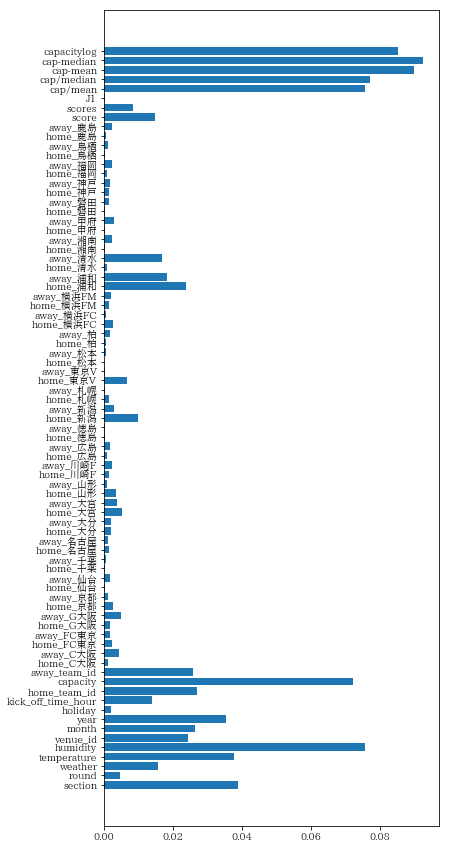

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
font = {'family':'TakaoPMincho'}
mpl.rc('font', **font)
plt.figure(figsize=(6, 15))
plt.barh(train_X.columns, rfr.feature_importances_)

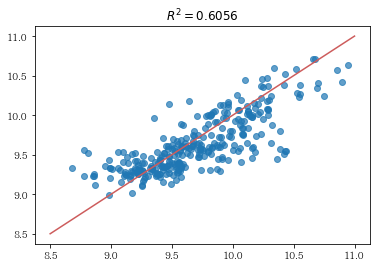

In [181]:
from sklearn.metrics import r2_score
plt.scatter(val_y, val_pred, alpha=0.7)
plt.title("$R^2 = {:<.5}$".format(r2_score(val_y, val_pred)))
x = np.linspace(8.5, 11, 100)
plt.plot(x, x, c="indianred")

In [30]:
smpsb_df = pd.read_csv("./input/sample_submit.csv", header=None)
rfr.fit(all_train_X, all_train_y)
test_pred = rfr.predict(test_X)
smpsb_df.iloc[:len(test_X), 1] = np.expm1(rfr.predict(test_X))

In [31]:
smpsb_df.to_csv("./output/tutorial_result9.csv", index=None, header=None)

## xgb

In [128]:
import xgboost as xgb
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

import matplotlib as mpl

import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
trainData = pd.read_csv("./input/5new_traindata.csv",index_col=None)
trainData.head()

,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,...,away_鳥栖,home_鹿島,away_鹿島,score,scores,J1,cap/mean,cap/median,cap-mean,cap-median
0,2006-03-04,16:04,1,1,G大阪,浦和,万博記念競技場,1,8.3,40.0,...,False,False,False,0,1,1,0.662519,0.782793,-10697.194593,-5827.0
1,2006-03-05,13:00,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,1,12.9,28.0,...,False,False,False,-2,0,1,0.500328,0.591158,-15838.194593,-10968.0
2,2006-03-05,13:35,1,2,FC東京,大分,味の素スタジアム,1,12.1,35.0,...,False,False,False,2,2,0,1.545847,1.826481,17301.805407,22172.0
3,2006-03-05,14:04,1,2,磐田,福岡,静岡スタジアムエコパ,1,11.6,42.0,...,False,False,False,0,1,1,1.630965,1.927051,19999.805407,24870.0
4,2006-03-05,14:04,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,1,13.1,32.0,...,False,False,False,1,2,1,0.638006,0.753830,-11474.194593,-6604.0


In [154]:
testData = pd.read_csv("./input/5new_testdata.csv",index_col=None)

In [155]:
all_train_X = trainData.query("year <= 2016").drop(["day_of_the_week", "attendance","venue","home_team","away_team","kick_off_time","match_date"], axis=1)
all_train_X['capacitylog'] = np.log1p(trainData.query("year <= 2016")['capacity'])
all_train_y = np.log1p(trainData.query("year <= 2016")["attendance"])

train_X = trainData.query("year <= 2015").drop(["day_of_the_week", "attendance","away_team","venue","home_team","kick_off_time","match_date"], axis=1)
train_X['capacitylog'] = np.log1p(trainData.query("year <= 2015")['capacity'])
train_X['capacitylog'] = np.log1p(trainData.query("year <= 2015")['capacity'])
train_y = np.log1p(trainData.query("year <= 2015")["attendance"])

val_X = trainData.query("year == 2016").drop(["day_of_the_week", "attendance","home_team","venue","away_team","kick_off_time","match_date"], axis=1)
val_X['capacitylog'] = np.log1p(trainData.query("year == 2016")['capacity'])
val_y = np.log1p(trainData.query("year == 2016")["attendance"])

test_X = testData.drop(["day_of_the_week","home_team","venue","away_team","kick_off_time","match_date"], axis=1)
test_X['capacitylog'] = np.log1p(testData['capacity'])

### linear

In [176]:
xg_boost = xgb.XGBRegressor(base_score=train_y.mean(),learning_rate=0.05,max_depth=20,
    nthread=8, objective='reg:linear',colsample_bytree=1,
       silent=True,subsample=0.6)

In [177]:
xg_boost.fit(train_X, train_y)
train_pred = xg_boost.predict(train_X)
val_pred = xg_boost.predict(val_X)
#print(xg_boost.score(, Y_train))

print("train_score: {:<.5}".format(np.sqrt(mean_squared_error(train_y, train_pred))))
print("train_score: {:<.5}".format(np.sqrt(mean_squared_error(val_y, val_pred))))

train_score: 0.062709
train_score: 0.26983


In [73]:
smpsb_df = pd.read_csv("./input/sample_submit.csv", header=None)
xg_boost.fit(all_train_X, all_train_y)
test_pred = xg_boost.predict(test_X)
smpsb_df.iloc[:len(test_X), 1] = np.expm1(xg_boost.predict(test_X))

In [40]:
smpsb_df = pd.read_csv("./input/sample_submit.csv", header=None)
smpsb_df.iloc[:len(test_X), 1] = np.expm1(xg_boost.predict(test_X))

In [26]:
len(np.expm1(xg_boost.predict(test_X)))

/home/aj1m0n/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


477

In [41]:
smpsb_df.to_csv("./output/tutorial_result12.csv", index=None, header=None)

### tree